In [301]:
#imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
import scipy as sp
import seaborn as sns
import chess
plt.style.use('ggplot')

In [302]:
#loading data

data = pd.read_csv('games.csv')


data['created_at'] = pd.to_datetime(data['created_at']/1000, 
                                           unit='s', 
                                           origin='unix')

data['last_move_at'] = pd.to_datetime(data['last_move_at']/1000, 
                                             unit='s', 
                                             origin='unix')

data

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [303]:
#some general info
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,20058,20058,20058.000000,20058.000000,20058.000000,20058.000000
mean,2017-01-05 11:47:32.629092352,2017-01-05 12:02:02.336142080,60.465999,1596.631868,1588.831987,4.816981
min,2013-08-17 20:33:53.173000097,2013-08-17 20:37:43.841000080,1.000000,784.000000,789.000000,1.000000
25%,2016-10-27 05:51:40,2016-10-27 05:51:40,37.000000,1398.000000,1391.000000,3.000000
50%,2017-05-28 22:20:00,2017-05-28 22:20:00,55.000000,1567.000000,1562.000000,4.000000
75%,2017-08-19 19:13:20,2017-08-19 19:13:20,79.000000,1793.000000,1784.000000,6.000000
max,2017-09-04 02:45:43.789999962,2017-09-04 02:57:07.262000084,349.000000,2700.000000,2723.000000,28.000000
std,NaN,NaN,33.570585,291.253376,291.036126,2.797152


# Analysis of victory status distribution for all the games and differentiated by time control type

In [304]:
outoftime_all = data[data['victory_status']=='outoftime']
resign_all = data[data['victory_status']=='resign']
mate_all = data[data['victory_status']=='mate']
draw_all = data[data['victory_status']=='draw']

In [305]:
outoftime_percent = round(100*len(outoftime_all)/len(data),2)
resign_percent = round(100*len(resign_all)/len(data),2)
mate_percent = round(100*len(mate_all)/len(data),2)
draw_percent = round(100*len(draw_all)/len(data),2)


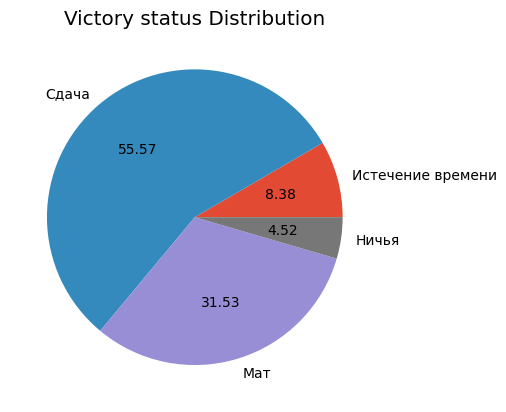

In [306]:
labels = ['Истечение времени', 'Сдача', 'Мат', 'Ничья']
sizes = [outoftime_percent, resign_percent, mate_percent, draw_percent]


def absolute_value(val):
    a  = np.round(val, 2)
    return a

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,
        autopct=absolute_value)
ax.set_title('Victory status Distribution')
plt.show()

In [307]:
#splitting the games by time control type
data['start_time'] = data.apply(lambda x: x['increment_code'].split('+')[0], axis=1)

In [308]:
data

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,start_time
0,TZJHLljE,False,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,15
1,l1NXvwaE,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,5
2,mIICvQHh,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,5
3,kWKvrqYL,True,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,20
4,9tXo1AUZ,True,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,10
20054,WSJDhbPl,True,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,10
20055,yrAas0Kj,True,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,10
20056,b0v4tRyF,True,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,10


In [309]:
data['start_time'].nunique()

33

In [310]:
data['time_control_type'] = data.apply(lambda x: 'blitz' if int(x['start_time'])<=5 else ('rapid' if int(x['start_time'])<20 else 'classical'), axis=1)

In [311]:
data

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,start_time,time_control_type
0,TZJHLljE,False,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,15,rapid
1,l1NXvwaE,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,5,blitz
2,mIICvQHh,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,5,blitz
3,kWKvrqYL,True,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,20,classical
4,9tXo1AUZ,True,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,30,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,10,rapid
20054,WSJDhbPl,True,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,10,rapid
20055,yrAas0Kj,True,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,10,rapid
20056,b0v4tRyF,True,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,10,rapid


In [312]:
blitz_games = data[data['time_control_type']=='blitz']
rapid_games = data[data['time_control_type']=='rapid']
classical_games = data[data['time_control_type']=='classical']


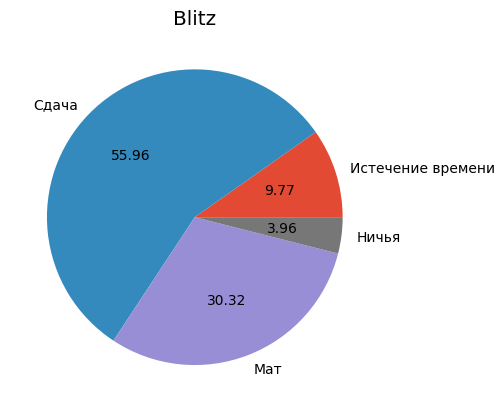

In [313]:
#victory status distributions for games of different time controls

outoftime_percent_blitz = blitz_games['victory_status'].value_counts()['outoftime']/len(blitz_games)
resign_percent_blitz = blitz_games['victory_status'].value_counts()['resign']/len(blitz_games)
mate_percent_blitz = blitz_games['victory_status'].value_counts()['mate']/len(blitz_games)
draw_percent_blitz = blitz_games['victory_status'].value_counts()['draw']/len(blitz_games)
sizes_blitz = [outoftime_percent_blitz, resign_percent_blitz, mate_percent_blitz, draw_percent_blitz]


rapid_games['victory_status'].value_counts()
outoftime_percent_rapid = rapid_games['victory_status'].value_counts()['outoftime']/len(rapid_games)
resign_percent_rapid = rapid_games['victory_status'].value_counts()['resign']/len(rapid_games)
mate_percent_rapid = rapid_games['victory_status'].value_counts()['mate']/len(rapid_games)
draw_percent_rapid = rapid_games['victory_status'].value_counts()['draw']/len(rapid_games)

sizes_rapid = [outoftime_percent_rapid, resign_percent_rapid, mate_percent_rapid, draw_percent_rapid]





classical_games['victory_status'].value_counts()
outoftime_percent_classical = classical_games['victory_status'].value_counts()['outoftime']/len(classical_games)
resign_percent_classical = classical_games['victory_status'].value_counts()['resign']/len(classical_games)
mate_percent_classical = classical_games['victory_status'].value_counts()['mate']/len(classical_games)
draw_percent_classical = classical_games['victory_status'].value_counts()['draw']/len(classical_games)
sizes_classical = [outoftime_percent_classical, resign_percent_classical, mate_percent_classical, draw_percent_classical]
fig, ax = plt.subplots()
ax.set_title("Blitz")
ax.pie(sizes_blitz, labels=labels,autopct=absolute_value)
plt.show()


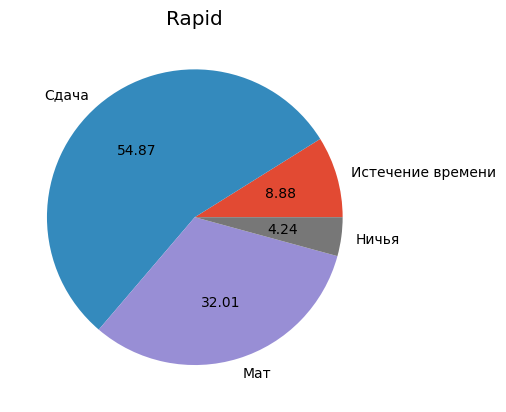

In [314]:
fig, ax = plt.subplots()
ax.set_title("Rapid")
ax.pie(sizes_rapid, labels=labels,autopct=absolute_value)
plt.show()

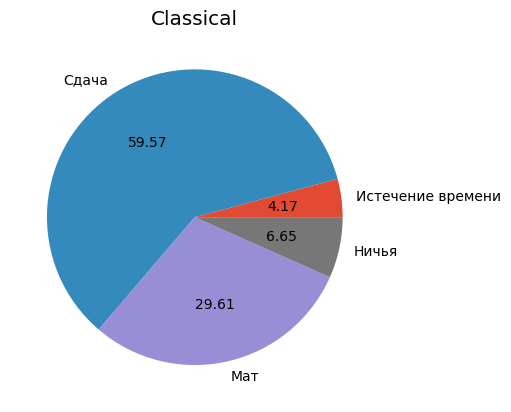

In [315]:
fig, ax = plt.subplots()
ax.set_title("Classical")
ax.pie(sizes_classical, labels=labels,autopct=absolute_value)
plt.show()

In [316]:
print(sizes_blitz[3], sizes_rapid[3], sizes_classical[3])

0.03955078125 0.042404654169360054 0.06653543307086614


# Comparison of victory status percentages for different time control settings

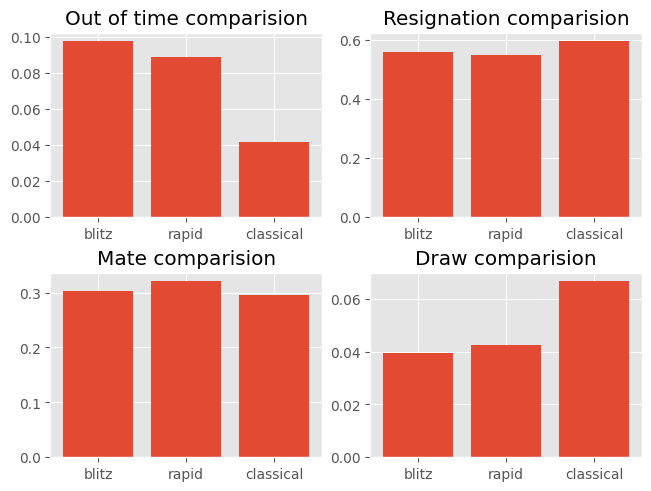

In [317]:
X = ['blitz','rapid','classical']
Y1 = [outoftime_percent_blitz, outoftime_percent_rapid, outoftime_percent_classical]
Y2 = [resign_percent_blitz, resign_percent_rapid, resign_percent_classical]
Y3 = [mate_percent_blitz, mate_percent_rapid, mate_percent_classical]
Y4 = [draw_percent_blitz, draw_percent_rapid, draw_percent_classical]
figure, axis = plt.subplots(2, 2, layout="constrained") 
  
axis[0, 0].bar(X, Y1) 
axis[0, 0].set_title("Out of time comparision") 
  
axis[0, 1].bar(X, Y2) 
axis[0, 1].set_title("Resignation comparision") 
  
axis[1, 0].bar(X, Y3) 
axis[1, 0].set_title("Mate comparision")   

axis[1, 1].bar(X, Y4) 
axis[1, 1].set_title("Draw comparision") 

plt.show() 

In [318]:
#filtering game with fair elo difference
df_filtered = data.query('abs(white_rating - black_rating)<100 & time_control_type=="blitz"').copy()

In [319]:
df_filtered

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,start_time,time_control_type
1,l1NXvwaE,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,5,blitz
2,mIICvQHh,True,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,5,blitz
64,XuyVUkDi,True,2017-08-29 01:26:40.000000000,2017-08-29 01:26:40.000000000,40,mate,black,5+10,porquepepe,1618,oldpaths,1568,e4 e6 Bc4 d5 exd5 exd5 Bb3 Qe7+ Ne2 Nf6 d4 Nc6...,C00,French Defense #2,2,5,blitz
67,l7top9ps,True,2017-08-27 05:00:00.000000000,2017-08-27 05:00:00.000000000,78,resign,black,5+40,berejokserg,1500,oldpaths,1554,e4 e6 Nc3 Bb4 Nge2 Ne7 a3 Bxc3 Nxc3 d5 d4 Nd7 ...,C00,French Defense: Queen's Knight,3,5,blitz
112,z1LTn4pe,True,2017-08-25 16:53:20.000000000,2017-08-25 16:53:20.000000000,40,resign,black,5+8,cdvh,1795,hunecel,1760,d4 Nf6 Nf3 e6 e3 b6 Bd3 Bb7 c4 c5 Qc2 Bxf3 gxf...,A46,Yusupov-Rubinstein System,5,5,blitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19807,f7HUgvMm,True,2017-08-21 16:26:20.469000101,2017-08-21 16:49:24.548000097,88,mate,black,5+10,vares,1612,antoniovictortg,1579,Nf3 d5 d4 Bg4 Nc3 Bxf3 gxf3 e6 Bf4 c5 Rg1 h6 e...,D02,Queen's Pawn Game: Anti-Torre,4,5,blitz
19811,kqMwgm63,False,2017-08-19 10:56:29.423000097,2017-08-19 11:13:16.464999914,92,resign,black,3+10,vares,1626,seciyeli,1615,e4 d5 Nf3 dxe4 Ng5 e6 Nxe4 Nf6 Nbc3 a6 Be2 b5 ...,A06,Zukertort Opening: Tennison Gambit,3,3,blitz
19820,sNlSeD4s,True,2017-08-14 15:46:47.637000084,2017-08-14 16:03:42.256999969,127,resign,white,5+5,vinhasale,1725,vares,1644,e4 e5 Qf3 Nf6 h3 d5 d3 d4 Ne2 Nc6 c3 Be6 Ng3 g...,C20,King's Pawn Game: Napoleon Attack,3,5,blitz
19996,O4hEQMTb,True,2017-06-29 20:08:42.190000057,2017-06-29 20:19:11.388999939,60,resign,black,5+5,rqmik,1980,rb52,2017,f4 d5 Nf3 Nf6 e3 g6 b3 Bg7 Bb2 O-O Nc3 c5 Bd3 ...,A03,Bird Opening: Dutch Variation,2,5,blitz


In [320]:
#adding average elo column
df_filtered['avg_rating'] = df_filtered[['white_rating', 'black_rating']].mean(axis=1)

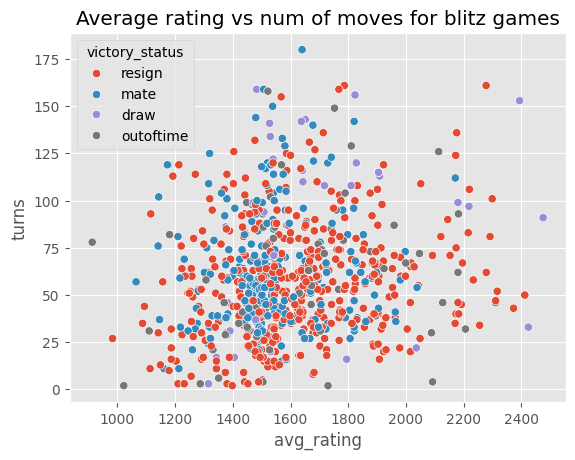

In [321]:
#pairplotting rating vs victory status distribution
ax = sns.scatterplot(x='avg_rating',y='turns',hue='victory_status',data=df_filtered)
ax.set_title('Average rating vs num of moves for blitz games')
plt.show()

# Analysis of most common openings for different rating levels

In [282]:
data['avg_rating'] = data[['white_rating', 'black_rating']].mean(axis=1)

In [283]:
data.query('avg_rating>=2000')['opening_name'].value_counts()

opening_name
Queen's Pawn Game: London System                                   20
Indian Game                                                        20
Queen's Pawn Game: Mason Attack                                    15
Caro-Kann Defense: Exchange Variation                              13
Sicilian Defense                                                   13
                                                                   ..
Nimzo-Indian Defense: Romanishin Variation #2                       1
Polish Opening                                                      1
King's Indian Defense: Fianchetto Variation |  Debrecen Defense     1
Tarrasch Defense: Classical Variation |  Carlsbad Variation         1
Pirc Defense: Austrian Attack |  Kurajica Variation                 1
Name: count, Length: 659, dtype: int64

In [284]:
data.query('avg_rating>1500 & avg_rating<2000')['opening_name'].value_counts()

opening_name
Sicilian Defense                                                  199
Sicilian Defense: Bowdler Attack                                  184
French Defense: Knight Variation                                  165
Scotch Game                                                       151
Queen's Pawn Game: Mason Attack                                   142
                                                                 ... 
Neo-Gruenfeld Defense                                               1
Colle System: Traditional Colle                                     1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: count, Length: 1233, dtype: int64

In [285]:
data.query('avg_rating<=1500')['opening_name'].value_counts()

opening_name
Van't Kruijs Opening                                                                      276
Scandinavian Defense                                                                      169
Sicilian Defense                                                                          146
King's Pawn Game: Wayward Queen Attack                                                    140
Scandinavian Defense: Mieses-Kotroc Variation                                             135
                                                                                         ... 
Scotch Gambit                                                                               1
Ruy Lopez: Schliemann Defense |  Jaenisch Gambit Accepted                                   1
Nimzowitsch Defense: Scandinavian Variation |  Bogoljubov Variation |  Vehre Variation      1
Gruenfeld Defense: Russian Variation |  Accelerated Variation                               1
English Opening: King's English Variation |  Fo

# Distribution of number of games vs elo difference

In [286]:
data['rating_diff'] = (data['white_rating']-data['black_rating'])

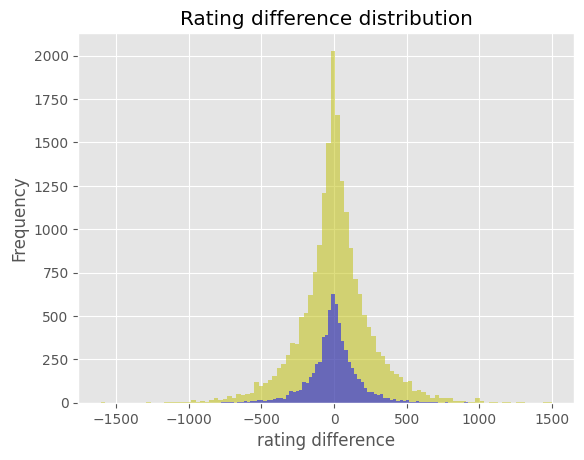

In [287]:
ax = data['rating_diff'].plot(
    kind='hist',bins=100,title='Rating difference distribution',alpha=0.5,color='y'
)
df1 = data.query('(rating_diff>0 & winner=="black") or (rating_diff<0 & winner=="white")')
ax = df1['rating_diff'].plot(
    kind='hist',bins=100,title='Rating difference distribution',alpha=0.5,color='b'
)

ax.set_xlabel('rating difference')
plt.show()


purple subplot visualizes the same distribution but only for games that were upsets

In [324]:
data.shape

(20058, 18)

In [325]:
6556/20058

0.3268521288264034

lower rated players only win about 33% of the time